In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set()

In [2]:
trainData = pd.read_csv('clean-train-data.csv')
trainData.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Risk_Class
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,No Risk
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,No Risk
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,No Risk
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,Risk
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,Risk


In [3]:
def calc_cluster_rate(i):
    # calc risk rate for each cluster
    no_risk = risk = 0
    calcData = X_labeled.loc[X_labeled['Cluster'] == i]
    for index, row in calcData.iterrows():
        if row['Risk_Flag'] == 1:
            risk += 1
        else:
            no_risk += 1
    rate = (risk)/(risk + no_risk) * 100
    print("Cluster ", i, ": \t", "{:.2f}%".format(rate))
    print("Risk: ", risk, "\tNo Risk: ", no_risk)
    return rate

In [4]:
def printMedian(data):
    # Print median of Age and Experience
    print("Age Median: \t", data['Age'].median())
    print("Experience Median: ", data['Experience'].median())    

In [5]:
def clusterDescribe(i, rate):
    # Calc Income range of given cluster
    print("Cluster ", i, ": \t", "{:.2f}%".format(rate))
    calcData = X_labeled.loc[X_labeled['Cluster'] == i]
    print("Income IQR: ", int(calcData['Income'].quantile(0.25)), " - ", int(calcData['Income'].quantile(0.75)), "rupee")
    printMedian(calcData)

# Narrowing datasets based on Feature Importances
Numeric data: `Income`, `Age` and `Experience` have higher significance in prediction loan defaulters

---

## Multi-Variate Clustering - Police Officer



In [6]:
# Extract the Features from the Data
POData = trainData.loc[trainData['Profession'] == 'Police_officer']
X = pd.DataFrame(POData[["Income", "Age", "Experience", "Risk_Flag"]]) 

In [7]:
# Extract the Features from the Data
X = pd.DataFrame(POData[["Income", "Age", "Experience", "Risk_Flag"]]) 

In [8]:
# Import essential models from sklearn
from sklearn.cluster import KMeans

# Set "optimal" Clustering Parameters
num_clust = 3
init_algo = 'k-means++'

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust,         
               init = init_algo,
               n_init = 20)                 

# Fit the Clustering Model on the Data
kmeans.fit(X)

KMeans(n_clusters=3, n_init=20)

Features 	Income 		Age 	Exp 	Risk_Flag
Cluster 0:	1420016.44	50.56	10.11	0.18	
Cluster 1:	8466247.67	50.13	8.15	0.17	
Cluster 2:	4808158.56	45.69	10.62	0.15	

Within Cluster Sum of Squares : 4674776060596163.0



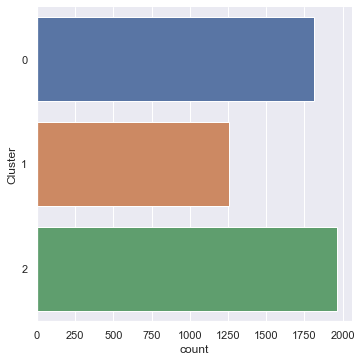

In [9]:
# Print the Cluster Centers
print("Features", "\tIncome", "\t\tAge", "\tExp", "\tRisk_Flag")
for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()
print()

# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.catplot(y = "Cluster", data = X_labeled, kind = "count")

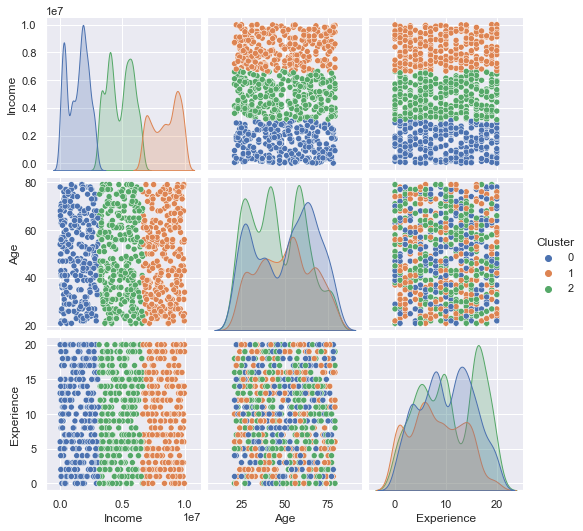

In [10]:
# Plot the Clusters on 2D grids
X_labeledNumeric = X_labeled.drop(columns = 'Risk_Flag')
sb.pairplot(X_labeledNumeric, hue = "Cluster")

<AxesSubplot:xlabel='Experience', ylabel='Cluster'>

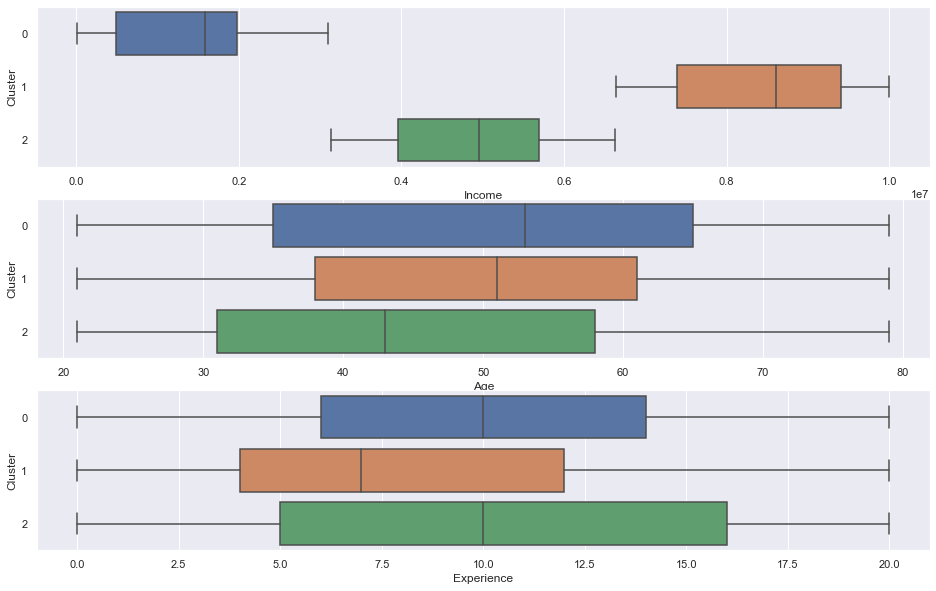

In [11]:
# Boxplots for all Features against the Clusters
f, axes = plt.subplots(3, 1, figsize=(16,10))
sb.boxplot(x = 'Income', y = 'Cluster', data = X_labeled, ax = axes[0])
sb.boxplot(x = 'Age', y = 'Cluster', data = X_labeled, ax = axes[1])
sb.boxplot(x = 'Experience', y = 'Cluster', data = X_labeled, ax = axes[2])

In [12]:
highest_rate = calc_cluster_rate(0)
cluster = 0
for i in range(1, num_clust):
    rate = calc_cluster_rate(i)
    if rate > highest_rate:
        highest_rate = rate
        cluster = i

Cluster  0 : 	 17.81%
Risk:  323 	No Risk:  1491
Cluster  1 : 	 16.61%
Risk:  209 	No Risk:  1049
Cluster  2 : 	 14.98%
Risk:  294 	No Risk:  1669


In [13]:
clusterDescribe(cluster, highest_rate)

Cluster  0 : 	 17.81%
Income IQR:  485503  -  1980740 rupee
Age Median: 	 53.0
Experience Median:  10.0


Police_officer <br>
Cluster 0: 17.81% <br>
Lowest `Income` group from 485,503 to 1,980,740 rupee per annum, median `Age` 53 years old and median `Experience` 10 years


---

## Multi-Variate Clustering - Manipur



In [14]:
# Extract the Features from the Data
ManipurData = trainData.loc[trainData['STATE'] == 'Manipur']
X = pd.DataFrame(ManipurData[["Income", "Age", "Experience", "Risk_Flag"]]) 

Ratio of classes is No_Risk : Risk =  666 : 183


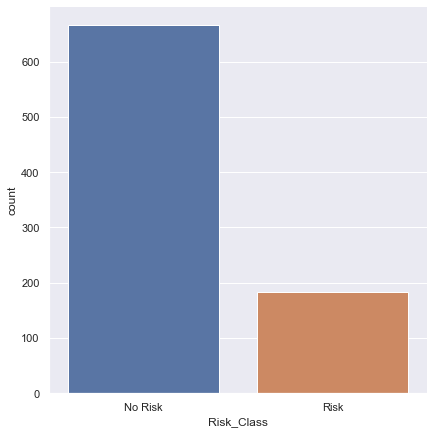

In [15]:
sb.catplot(data = ManipurData, kind = 'count', x = 'Risk_Class', height = 6)
countNR, countR = ManipurData['Risk_Class'].value_counts()
print("Ratio of classes is No_Risk : Risk = ", countNR, ":", countR)

In [16]:
# Import essential models from sklearn
from sklearn.cluster import KMeans

# Set "optimal" Clustering Parameters
num_clust = 3
init_algo = 'k-means++'

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust,         
               init = init_algo,
               n_init = 20)                 

# Fit the Clustering Model on the Data
kmeans.fit(X)

KMeans(n_clusters=3, n_init=20)

Features 	Income 		Age 	Exp 	Risk_Flag
Cluster 0:	1853128.94	48.52	5.72	0.18	
Cluster 1:	8210405.33	45.4	11.42	0.27	
Cluster 2:	5544824.94	53.5	9.34	0.16	

Within Cluster Sum of Squares : 571991509132882.2



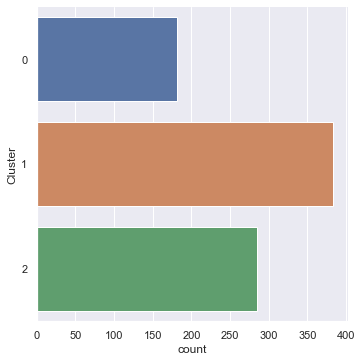

In [17]:
# Print the Cluster Centers
print("Features", "\tIncome", "\t\tAge", "\tExp", "\tRisk_Flag")
for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()
print()

# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.catplot(y = "Cluster", data = X_labeled, kind = "count")

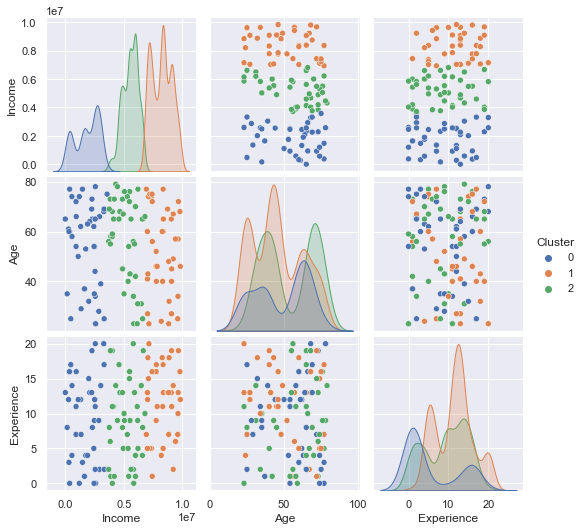

In [18]:
# Plot the Clusters on 2D grids
X_labeledNumeric = X_labeled.drop(columns = 'Risk_Flag')
sb.pairplot(X_labeledNumeric, hue = "Cluster")

<AxesSubplot:xlabel='Experience', ylabel='Cluster'>

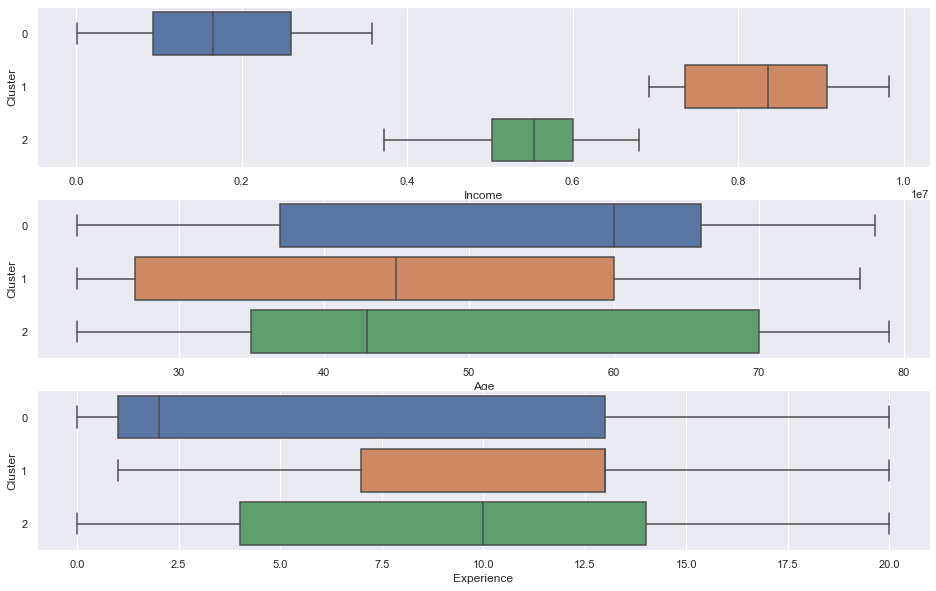

In [19]:
# Boxplots for all Features against the Clusters
f, axes = plt.subplots(3, 1, figsize=(16,10))
sb.boxplot(x = 'Income', y = 'Cluster', data = X_labeled, ax = axes[0])
sb.boxplot(x = 'Age', y = 'Cluster', data = X_labeled, ax = axes[1])
sb.boxplot(x = 'Experience', y = 'Cluster', data = X_labeled, ax = axes[2])

In [20]:
highest_rate = calc_cluster_rate(0)
cluster = 0
for i in range(1, num_clust):
    rate = calc_cluster_rate(i)
    if rate > highest_rate:
        highest_rate = rate
        cluster = i

Cluster  0 : 	 18.23%
Risk:  33 	No Risk:  148
Cluster  1 : 	 27.15%
Risk:  104 	No Risk:  279
Cluster  2 : 	 16.14%
Risk:  46 	No Risk:  239


In [21]:
clusterDescribe(cluster, highest_rate)

Cluster  1 : 	 27.15%
Income IQR:  7364088  -  9070646 rupee
Age Median: 	 45.0
Experience Median:  13.0


Manipur <br>
Cluster 1: 27.15% <br>
Highest `Income` group from 7,364,088 to 9,070,646 rupee per annum, median `Age` 45 years old and median `Experience` 13 years

---

## Multi-Variate Clustering - Bhubaneswar



In [22]:
# Extract the Features from the Data
BhubaneswarData = trainData.loc[trainData['CITY'] == 'Bhubaneswar']
X = pd.DataFrame(BhubaneswarData[["Income", "Age", "Experience", "Risk_Flag"]]) 

Ratio of classes is No_Risk : Risk =  409 : 198


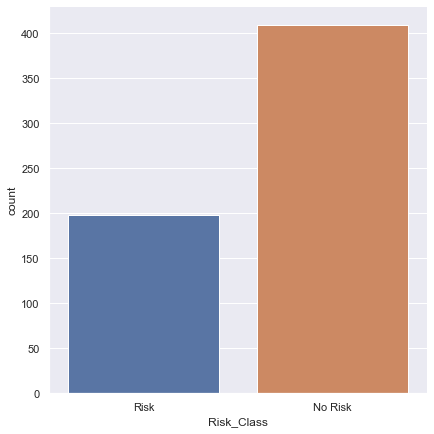

In [23]:
sb.catplot(data = BhubaneswarData, kind = 'count', x = 'Risk_Class', height = 6)
countNR, countR = BhubaneswarData['Risk_Class'].value_counts()
print("Ratio of classes is No_Risk : Risk = ", countNR, ":", countR)

In [24]:
# Import essential models from sklearn
from sklearn.cluster import KMeans

# Set "optimal" Clustering Parameters
num_clust = 3
init_algo = 'k-means++'

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust,         
               init = init_algo,
               n_init = 20)                 

# Fit the Clustering Model on the Data
kmeans.fit(X)

KMeans(n_clusters=3, n_init=20)

Features 	Income 		Age 	Exp 	Risk_Flag
Cluster 0:	4411383.74	49.92	12.85	0.28	
Cluster 1:	1536885.63	48.74	11.63	0.17	
Cluster 2:	6895226.91	51.36	6.9	0.47	

Within Cluster Sum of Squares : 273407826923895.06



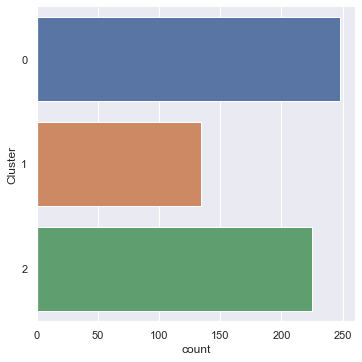

In [25]:
# Print the Cluster Centers
print("Features", "\tIncome", "\t\tAge", "\tExp", "\tRisk_Flag")
for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()
print()

# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.catplot(y = "Cluster", data = X_labeled, kind = "count")

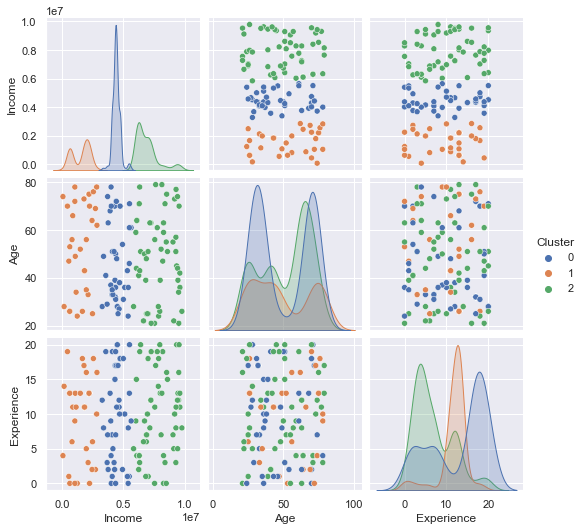

In [26]:
# Plot the Clusters on 2D grids
X_labeledNumeric = X_labeled.drop(columns = 'Risk_Flag')
sb.pairplot(X_labeledNumeric, hue = "Cluster")

<AxesSubplot:xlabel='Experience', ylabel='Cluster'>

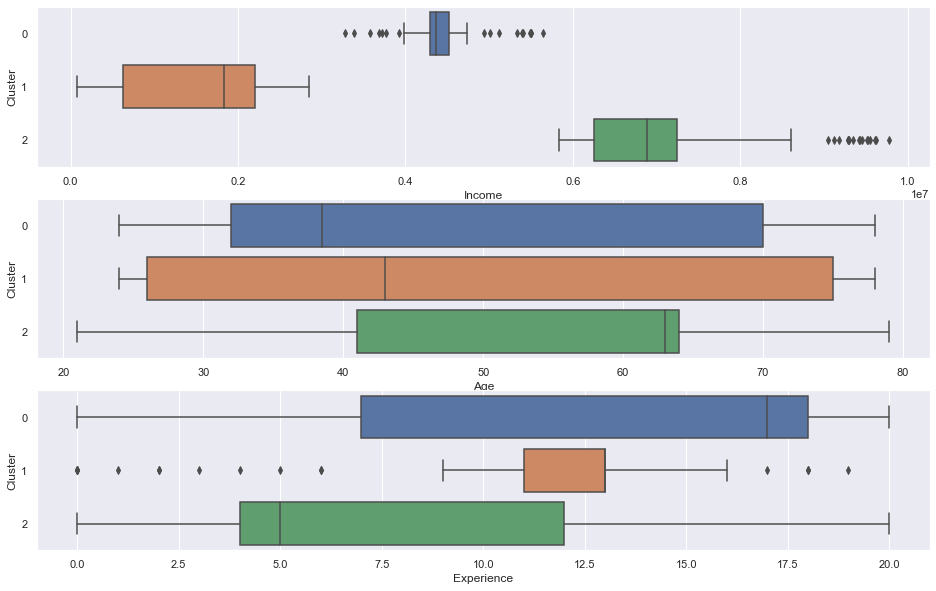

In [27]:
# Boxplots for all Features against the Clusters
f, axes = plt.subplots(3, 1, figsize=(16,10))
sb.boxplot(x = 'Income', y = 'Cluster', data = X_labeled, ax = axes[0])
sb.boxplot(x = 'Age', y = 'Cluster', data = X_labeled, ax = axes[1])
sb.boxplot(x = 'Experience', y = 'Cluster', data = X_labeled, ax = axes[2])

In [28]:
highest_rate = calc_cluster_rate(0)
cluster = 0
for i in range(1, num_clust):
    rate = calc_cluster_rate(i)
    if rate > highest_rate:
        highest_rate = rate
        cluster = i

Cluster  0 : 	 27.82%
Risk:  69 	No Risk:  179
Cluster  1 : 	 17.16%
Risk:  23 	No Risk:  111
Cluster  2 : 	 47.11%
Risk:  106 	No Risk:  119


In [29]:
clusterDescribe(cluster, highest_rate)

Cluster  2 : 	 47.11%
Income IQR:  6256451  -  7248241 rupee
Age Median: 	 63.0
Experience Median:  5.0


Bhubaneswar <br>
Cluster 2: 47.11% <br>
Highest `Income` group from 6,256,451 to 7,248,241 rupee per annum, median `Age` 63 years old and median `Experience` 5 years